In [1]:
from sklearn.datasets import make_moons
import numpy as np
from sklearn.cluster import DBSCAN

In [2]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [3]:
dbscan005 = DBSCAN(eps=0.05, min_samples=5)
dbscan005.fit(X)
dbscan02 = DBSCAN(eps=0.2, min_samples=5)
dbscan02.fit(X)

DBSCAN(eps=0.2)

In [4]:
dbscan005.labels_[:20], dbscan02.labels_[:20]

(array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2,  2,  4,
         2,  2,  4]),
 array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]))

In [5]:
len(dbscan005.core_sample_indices_), len(dbscan02.core_sample_indices_)

(808, 1000)

In [6]:
dbscan005.core_sample_indices_[:10], dbscan02.core_sample_indices_[:10]

(array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [7]:
np.unique(dbscan005.labels_), np.unique(dbscan02.labels_), 

(array([-1,  0,  1,  2,  3,  4,  5,  6]), array([0, 1]))

In [8]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

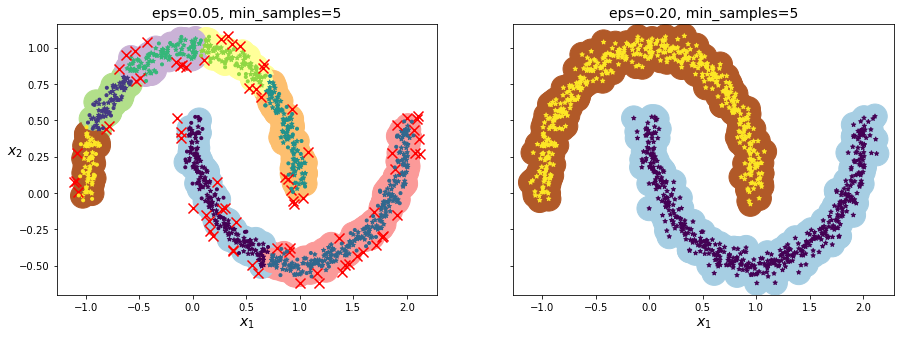

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

plt.subplot(121)
plot_dbscan(dbscan005, X, size=600)

plt.subplot(122)
plot_dbscan(dbscan02, X, size=600, show_ylabels=False)

plt.show()

In [15]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan02.components_, dbscan02.labels_[dbscan02.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

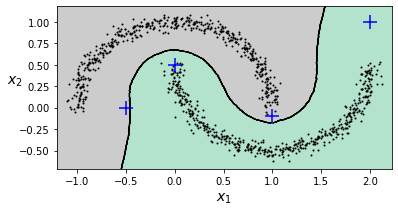

In [22]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()